# Урожайность и посевы

## Скачиваем данные

In [29]:
! gdown 1QrOI11LNDygurqYROFmlKLPiqpJK0riO

Downloading...
From: https://drive.google.com/uc?id=1QrOI11LNDygurqYROFmlKLPiqpJK0riO
To: /content/crops_usa.zip
100% 12.0k/12.0k [00:00<00:00, 14.2MB/s]


In [30]:
! unzip -o /content/crops_usa.zip -d /content

Archive:  /content/crops_usa.zip
  inflating: /content/crops_usa.csv  


## Скачиваем библиотеки и разбираемся с данными

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# служебная строка для полного отображения больших чисел
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [32]:
data = pd.read_csv('/content/crops_usa.csv')
data

,Year,State,State ANSI,Acres,Production
0,2019,ALABAMA,1,130000,6120000
1,2019,ARIZONA,4,34000,3432000
2,2019,ARKANSAS,5,110000,2600000
3,2019,CALIFORNIA,6,420000,7244000
4,2019,COLORADO,8,2150000,98000000
...,...,...,...,...,...
1665,1980,VIRGINIA,51,317000,10582000
1666,1980,WASHINGTON,53,3320000,160220000
1667,1980,WEST VIRGINIA,54,12000,380000
1668,1980,WISCONSIN,55,119000,4365000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670 entries, 0 to 1669
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        1670 non-null   int64 
 1   State       1670 non-null   object
 2   State ANSI  1670 non-null   int64 
 3   Acres       1670 non-null   int64 
 4   Production  1670 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 65.4+ KB


**Данные**

*   Year — год;
*   State — название штата;
*   State ANSI — код штата;
*   Acres — количество посевов в акрах для определённого штата и года;
*   Production — объём урожая для определённого штата и года в бушелях;

**Проблема**

Вам предстоит оценить, что важнее предсказывать — площадь посевов или урожайность.

**Гипотезы**

*   Предсказывание урожайности на этот год с помощью покозателей урожайности прошлого года важнее чем предсказывать с помощью площади посевов прошлого года.

*   Предсказывание урожайности на этот год с помощью площади посевов прошлого года важнее чем предсказывать с помощью покозателей урожайности прошлого года.




## Исследовательский анализ данных (EDA)

In [34]:
# уникальные значения столбца Year
years_unique = data['Year'].unique()
# количество уникальных значений столбца Year
years_unique_count = data['Year'].nunique()
print(years_unique)
print(years_unique_count)

[2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006
 2005 2004 2003 2002 2001 2000 1999 1998 1997 1996 1995 1994 1993 1992
 1991 1990 1989 1988 1987 1986 1985 1984 1983 1982 1981 1980]
40


In [35]:
states_unique = data['State'].unique()
print(states_unique)
states_unique_count = data['State'].nunique()
print(states_unique_count)

['ALABAMA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO' 'DELAWARE'
 'GEORGIA' 'IDAHO' 'ILLINOIS' 'INDIANA' 'KANSAS' 'KENTUCKY' 'MARYLAND'
 'MICHIGAN' 'MINNESOTA' 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA'
 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK' 'NORTH CAROLINA' 'NORTH DAKOTA'
 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'SOUTH CAROLINA' 'SOUTH DAKOTA'
 'TENNESSEE' 'TEXAS' 'UTAH' 'VIRGINIA' 'WASHINGTON' 'WISCONSIN' 'WYOMING'
 'FLORIDA' 'IOWA' 'LOUISIANA' 'NEVADA' 'WEST VIRGINIA']
42


Только 42 штата из 50. 

Возможно, не все штаты делятся статистикой по своим полям. Или в отсутствующих штатах вообще не растёт пшеница. Это можно проверить. Но пока лишь запомним, что данные не полностью покрывают всю территорию США.

In [36]:
# количество посевов в акрах в 2019
acres_2019 = data[data['Year'] == 2019]['Acres']
# штаты у которых есть значения в 2019
states_2019 = data[data['Year'] == 2019]['State']

print(acres_2019)
print(states_2019)

0      130000
1       34000
2      110000
3      420000
4     2150000
5       60000
6      150000
7     1195000
8      650000
9      330000
10    6900000
11     460000
12     345000
13     540000
14    1450000
15      45000
16     550000
17    5450000
18    1070000
19      19000
20     360000
21      90000
22     290000
23    7505000
24     500000
25    4200000
26     740000
27     180000
28      70000
29    1500000
30     280000
31    4500000
32     125000
33     180000
34    2260000
35     195000
36     125000
Name: Acres, dtype: int64
0            ALABAMA
1            ARIZONA
2           ARKANSAS
3         CALIFORNIA
4           COLORADO
5           DELAWARE
6            GEORGIA
7              IDAHO
8           ILLINOIS
9            INDIANA
10            KANSAS
11          KENTUCKY
12          MARYLAND
13          MICHIGAN
14         MINNESOTA
15       MISSISSIPPI
16          MISSOURI
17           MONTANA
18          NEBRASKA
19        NEW JERSEY
20        NEW MEXICO
21          NEW

## Визуализация

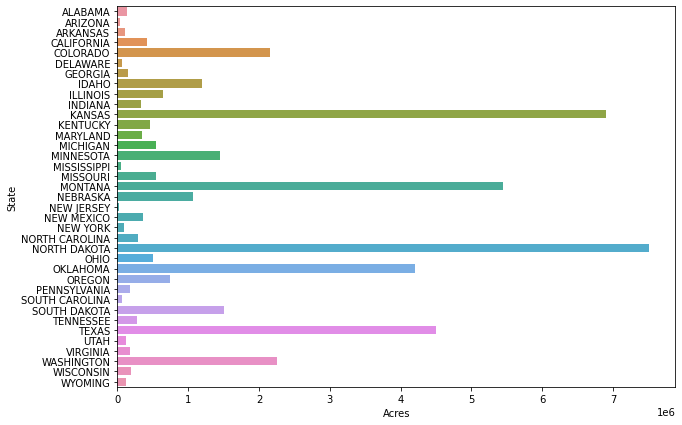

In [37]:
plt.rcParams['figure.figsize'] = [10, 7] # указываем размер графика

# количество посевов в акрах в 2019 в разных штатах
sns.barplot(x=acres_2019, y=states_2019);

Площадь посевов по штатам сильно различается. Судя по графику, за 90% посевов отвечают всего 10% штатов. Разумеется, это примерная оценка.

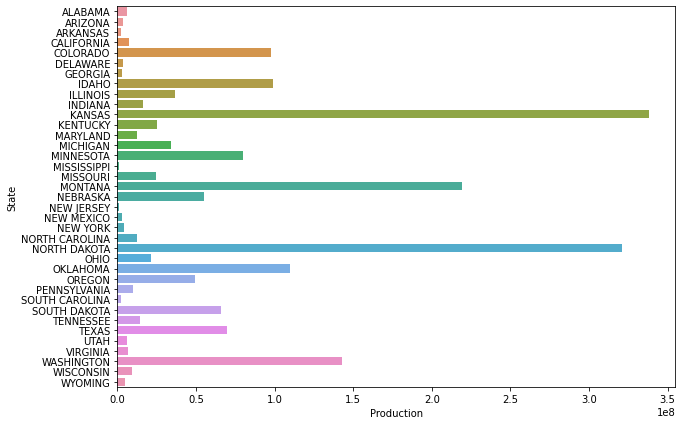

In [38]:
# объём урожая в бушелях для всех штатов в 2019
production_2019 = data[data['Year'] == 2019]['Production']

sns.barplot(x=production_2019, y=states_2019);

Логично — где больше посевных площадей, там и больше урожая. Однако есть тонкости. Например, в TEXAS (штат Техас) в 2019 году собрали примерно столько же урожая, сколько в SOUTH DAKOTA (штат Южная Дакота). При этом в SOUTH DAKOTA в три раза меньше посевных площадей.

In [39]:
# смотрим на площадь посевов в каждом году во всех штатах
# 1) группируем данные по году (Year) с помощью groupby('Year')
# 2) достаём из сгруппированной таблицы только столбец с площадью посевов
# 3) суммируем значения в каждой группе с помощью sum()
acres_usa = data.groupby('Year')['Acres'].sum()
acres_usa

Year
1980    80788000
1981    88251000
1982    86232000
1983    76419000
1984    79213000
1985    75535000
1986    71998000
1987    65829000
1988    65529000
1989    76615000
1990    77041000
1991    69881000
1992    72219000
1993    72168000
1994    70349000
1995    69031000
1996    75105000
1997    70412000
1998    65821000
1999    62664000
2000    62549000
2001    59432000
2002    60318000
2003    62141000
2004    59644000
2005    57214000
2006    57334000
2007    60460000
2008    63617000
2009    59017000
2010    52620000
2011    54277000
2012    55294000
2013    56236000
2014    56841000
2015    54999000
2016    50116000
2017    46052000
2018    47815000
2019    45158000
Name: Acres, dtype: int64

In [40]:
# считайем суммарные значения объёма урожая за каждый год:
# сгруппируйте данные по Year, 
# выберите столбец Production и примените sum()
production_usa = data.groupby('Year')['Production'].sum()
production_usa

Year
1980    2380934000
1981    2785357000
1982    2764967000
1983    2419824000
1984    2594777000
1985    2424115000
1986    2090570000
1987    2107685000
1988    1812201000
1989    2036618000
1990    2729778000
1991    1980139000
1992    2466798000
1993    2396440000
1994    2320981000
1995    2182708000
1996    2277388000
1997    2481466000
1998    2547321000
1999    2295560000
2000    2228160000
2001    1947453000
2002    1605878000
2003    2344415000
2004    2156790000
2005    2103325000
2006    1808416000
2007    2051088000
2008    2511896000
2009    2208918000
2010    2163023000
2011    1993111000
2012    2252307000
2013    2134979000
2014    2026310000
2015    2061939000
2016    2308663000
2017    1740910000
2018    1885156000
2019    1920139000
Name: Production, dtype: int64

In [41]:
# делим значения столбца production_usa на значения столбца acres_usa
yield_usa = production_usa / acres_usa
yield_usa

Year
1980   29.47
1981   31.56
1982   32.06
1983   31.67
1984   32.76
1985   32.09
1986   29.04
1987   32.02
1988   27.65
1989   26.58
1990   35.43
1991   28.34
1992   34.16
1993   33.21
1994   32.99
1995   31.62
1996   30.32
1997   35.24
1998   38.70
1999   36.63
2000   35.62
2001   32.77
2002   26.62
2003   37.73
2004   36.16
2005   36.76
2006   31.54
2007   33.92
2008   39.48
2009   37.43
2010   41.11
2011   36.72
2012   40.73
2013   37.96
2014   35.65
2015   37.49
2016   46.07
2017   37.80
2018   39.43
2019   42.52
dtype: float64

Визуализизируем с помощью столбчатой диаграммы, 

на которой по оси X отмечены года, а по оси Y — урожайность. 

Список лет — координат для оси X — лежит в переменной years_unique.

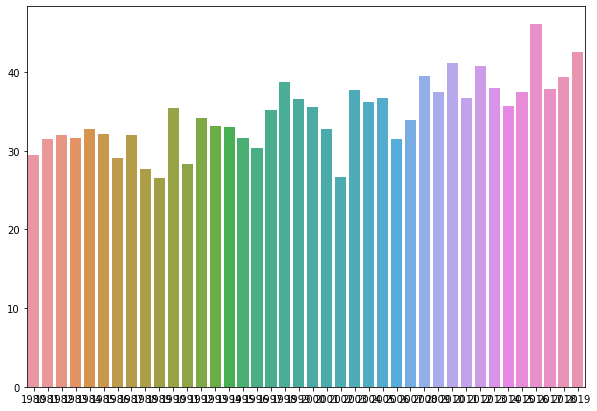

In [42]:
# достаём индексы (порядковые номера) столбца acres_usa, это числа от 1980 до 2019
years_unique = acres_usa.index.values

# строим столбчатую диаграмму урожайности по годам
sns.barplot(x=years_unique, y=yield_usa);

## Модель предсказания

Самый точный прогноз получится, если предсказать и площадь посевов, и урожайность. 

Есть две стратегии:
*   предсказать площадь посевов, а урожайность взять за предыдущий год;
*   предсказать урожайность, а площадь посевов взять за предыдущий год.

Какая даст более точный прогноз урожая? Ответив на этот вопрос, вы решите задачу.

Если выбрать первый вариант — предсказать площадь посевов, а урожайность взять за предыдущий год, — предсказанный объём урожая за определённый год будет равен произведению реальной площади посевов (acres) за этот год (t) и прошлогодней урожайности (yield, t-1):

$$ acres_t * yield_{t-1} $$

Во втором случае наоборот — произведению прошлогодней площади посевов и реальной урожайности за выбранный год:

$$ acres_{t-1} * yield_t $$

Как получить данные за прошлый год? 

Выход — «сдвинуть» столбец yield или acres на одно значение вперёд. Тогда для 1981 года будут данные за 1980 и так далее.


In [43]:
yield_usa

Year
1980   29.47
1981   31.56
1982   32.06
1983   31.67
1984   32.76
1985   32.09
1986   29.04
1987   32.02
1988   27.65
1989   26.58
1990   35.43
1991   28.34
1992   34.16
1993   33.21
1994   32.99
1995   31.62
1996   30.32
1997   35.24
1998   38.70
1999   36.63
2000   35.62
2001   32.77
2002   26.62
2003   37.73
2004   36.16
2005   36.76
2006   31.54
2007   33.92
2008   39.48
2009   37.43
2010   41.11
2011   36.72
2012   40.73
2013   37.96
2014   35.65
2015   37.49
2016   46.07
2017   37.80
2018   39.43
2019   42.52
dtype: float64

In [44]:
# сдвигаем столбец на один шаг вперёд с помощью shift(1)
yield_usa_shifted = yield_usa.shift(1)
yield_usa_shifted

Year
1980     NaN
1981   29.47
1982   31.56
1983   32.06
1984   31.67
1985   32.76
1986   32.09
1987   29.04
1988   32.02
1989   27.65
1990   26.58
1991   35.43
1992   28.34
1993   34.16
1994   33.21
1995   32.99
1996   31.62
1997   30.32
1998   35.24
1999   38.70
2000   36.63
2001   35.62
2002   32.77
2003   26.62
2004   37.73
2005   36.16
2006   36.76
2007   31.54
2008   33.92
2009   39.48
2010   37.43
2011   41.11
2012   36.72
2013   40.73
2014   37.96
2015   35.65
2016   37.49
2017   46.07
2018   37.80
2019   39.43
dtype: float64

In [45]:
# умножаем площадь посевов за каждый год
# на урожайность за предыдущий год,
# получив её с помощью команды shift(1)
predict_acres = acres_usa * yield_usa_shifted
predict_acres

Year
1980             NaN
1981   2600878923.03
1982   2721633803.85
1983   2450320219.56
1984   2508296608.33
1985   2474296904.49
1986   2310603452.31
1987   1911443825.25
1988   2098079727.25
1989   2118783738.73
1990   2047942143.68
1991   2476079184.04
1992   2046388266.35
1993   2465055983.38
1994   2336037545.17
1995   2277497042.05
1996   2374763285.19
1997   2135083467.89
1998   2319669567.49
1999   2425142783.37
2000   2291347223.92
2001   2117124256.50
2002   1976485227.72
2003   1654412692.70
2004   2250209817.35
2005   2068918634.90
2006   2107736490.19
2007   1907015581.68
2008   2158188311.21
2009   2330266536.18
2010   1969487862.14
2011   2231136438.07
2012   2030456355.99
2013   2290677767.06
2014   2157947601.87
2015   1960645021.90
2016   1878872978.13
2017   2121449207.36
2018   1807556928.04
2019   1780401017.42
dtype: float64

Предсказания по первой модели готовы! Вот последние три значения из списка production_usa с реальными показателями урожая: 1740910000, 1885156000, 1920139000. 

Сравнивать трудно. Но, по крайней мере, порядок примерно совпадает.

Теперь предскажите объёмы урожая, придерживаясь второй стратегии, — умножьте урожайность за каждый год на площадь посевов за предыдущий год. Результат сохраните в переменной predict_yield

In [46]:
# умножаем урожайность за каждый год
# на площадь посевов за предыдущий год,
# получив её с помощью команды shift(1)
predict_yield = acres_usa.shift(1) * yield_usa
predict_yield

Year
1980             NaN
1981   2549811575.12
1982   2829704781.48
1983   2730554746.44
1984   2503254056.32
1985   2542151605.15
1986   2193272104.09
1987   2305201425.36
1988   1820497484.00
1989   1741924439.37
1990   2714683629.11
1991   2183023836.22
1992   2386938493.17
1993   2398133526.77
1994   2380994140.76
1995   2224382162.97
1996   2093207789.47
1997   2646857125.63
1998   2724996068.91
1999   2411209861.48
2000   2232256602.66
2001   2049590081.05
2002   1582289553.63
2003   2275638048.47
2004   2247084155.82
2005   2192657676.44
2006   1804630987.27
2007   1945039354.81
2008   2387242909.29
2009   2381089116.80
2010   2425981155.28
2011   1932264141.72
2012   2210881235.56
2013   2099216317.41
2014   2004742512.62
2015   2130996467.19
2016   2533605162.76
2017   1894541943.02
2018   1815647895.26
2019   2033115866.18
dtype: float64

## Ошибки предсказаний

Чтобы оценить, насколько успешны две стратегии, осталось сравнить предсказанные в соответствии с ними объёмы урожая за каждый год и реальные исторические данные. Проще всего это сделать, вычтя предсказания из правильных ответов. Тогда победит та стратегия, где разница окажется меньше.

Вычислим ошибки предсказаний для первой стратегии — площадь посевов будет реальной, а урожайность прошлогодней.

Создадим переменную error_acres и сохраним в ней разницу реального и предсказанного объёма урожая за каждый год, кроме 1980. Ошибку будем считать так: 

$$ production\texttt{_}usa - predict\texttt{_}acres $$


### Прогноз1

предсказать площадь посевов с помощью урожайности за предыдущий год

In [47]:
# ошибка — это разность между реальными значениями и предсказанными
error_acres = production_usa - predict_acres
# удаляем самое первое значение методом dropna(),
# оно не понадобится, ведь данных за 1979 год нет,
# и разность находить не с чем
error_acres = error_acres.dropna()

# достаём индексы столбца error_acres — теперь это числа с 1981 до 2019
years_numbers = error_acres.index.values
years_numbers

array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019])

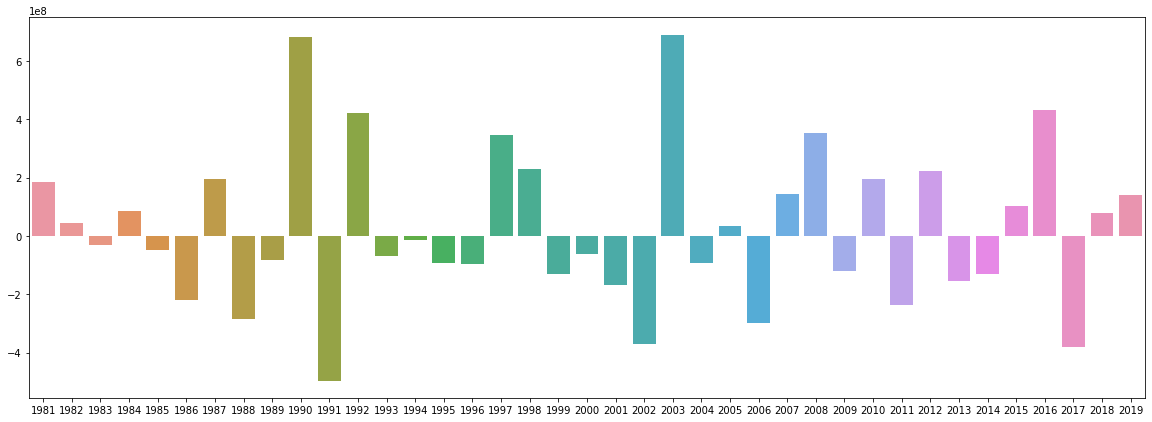

In [48]:
plt.rcParams['figure.figsize'] = [20, 7]

sns.barplot(x=years_numbers, y=error_acres);

### Прогноз2

предсказать урожайность с помощью площади посевов за предыдущий год

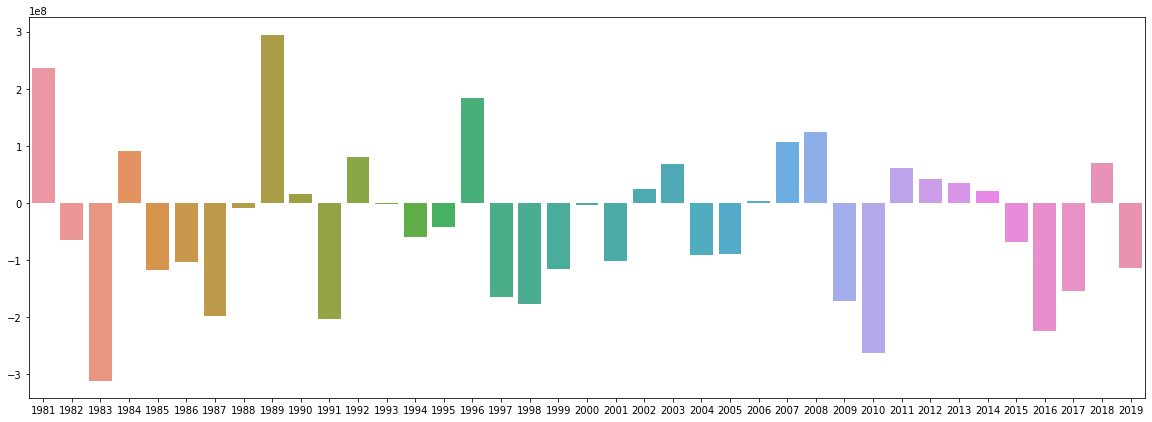

In [49]:
# ошибка — это разность между реальными значениями и предсказанными
error_yield = production_usa - predict_yield
# удаляем самое первое значение методом dropna(),
# оно не понадобится, ведь данных за 1979 год нет,
# и разность находить не с чем
error_yield = error_yield.dropna()

# достаём индексы столбца error_acres — это числа с 1981 до 2019
years_numbers = error_yield.index.values

sns.barplot(x=years_numbers, y=error_yield);

В этой стратегии ошибки тоже разнонаправленные, однако масштаб графика меньше. У нас есть победитель?

предсказать урожайность взяв площадь посевов

## Выразить ошибки одним числом

In [50]:
# применяем функцию abs() к столбцу error_acres и сохраняем в error_abs_acres
error_abs_acres = abs(error_acres)
error_abs_acres

Year
1981   184478076.97
1982    43333196.15
1983    30496219.56
1984    86480391.67
1985    50181904.49
1986   220033452.31
1987   196241174.75
1988   285878727.25
1989    82165738.73
1990   681835856.32
1991   495940184.04
1992   420409733.65
1993    68615983.38
1994    15056545.17
1995    94789042.05
1996    97375285.19
1997   346382532.11
1998   227651432.51
1999   129582783.37
2000    63187223.92
2001   169671256.50
2002   370607227.72
2003   690002307.30
2004    93419817.35
2005    34406365.10
2006   299320490.19
2007   144072418.32
2008   353707688.79
2009   121348536.18
2010   193535137.86
2011   238025438.07
2012   221850644.01
2013   155698767.06
2014   131637601.87
2015   101293978.10
2016   429790021.87
2017   380539207.36
2018    77599071.96
2019   139737982.58
dtype: float64

In [51]:
# применяем функцию abs() к столбцу error_yield и сохраняем в error_abs_yield
error_abs_yield = abs(error_yield)
error_abs_yield

Year
1981   235545424.88
1982    64737781.48
1983   310730746.44
1984    91522943.68
1985   118036605.15
1986   102702104.09
1987   197516425.36
1988     8296484.00
1989   294693560.63
1990    15094370.89
1991   202884836.22
1992    79859506.83
1993     1693526.77
1994    60013140.76
1995    41674162.97
1996   184180210.53
1997   165391125.63
1998   177675068.91
1999   115649861.48
2000     4096602.66
2001   102137081.05
2002    23588446.37
2003    68776951.53
2004    90294155.82
2005    89332676.44
2006     3785012.73
2007   106048645.19
2008   124653090.71
2009   172171116.80
2010   262958155.28
2011    60846858.28
2012    41425764.44
2013    35762682.59
2014    21567487.38
2015    69057467.19
2016   224942162.76
2017   153631943.02
2018    69508104.74
2019   112976866.18
dtype: float64

In [52]:
# считаем усреднённую ошибку первой стратегии:
# делим сумму модулей ошибок в error_abs_acres на количество элементов в error_abs_acres
result_acres = error_abs_acres.sum() / error_abs_acres.count()
result_acres

209394344.66107476

In [53]:
# считаем усреднённую ошибку второй стратегии:
# делим сумму модулей ошибок в error_abs_yield на количество элементов в error_abs_yield
result_yield = error_abs_yield.sum() / error_abs_yield.count()
result_yield

110396388.66393326

# Выводы
Прогноз номер 2 оказался более удачливым.

Лучше предсказать урожайность с помощью площади посевов за предыдущий год